# Modeling Machine Repair Time Using Gamma Distribution

## 🧠 Business Scenario
A manufacturing plant wants to analyze machine breakdown and repair durations. Some machines break down frequently but get fixed fast, while others take longer due to complexity. To:

Optimize technician shifts.

Predict downtime.

Minimize production loss.

We’ll model the repair duration using the Gamma distribution, since it represents time until multiple tasks are completed.

## 🎯 Why Gamma Distribution?
Repair involves multiple sequential steps: diagnosis → parts sourcing → actual repair → testing.

Times are positive and right-skewed.

Gamma allows us to flexibly model various repair complexities.

## ✅ Step 1: Simulate Machine Repair Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

np.random.seed(123)

# Gamma parameters for complex repair process
shape_k = 3.5     # number of repair stages
scale_theta = 1.5 # avg time per stage in hours

# Simulate 500 machine repairs
repair_durations = gamma.rvs(a=shape_k, scale=scale_theta, size=500)

# Add Machine Type and Shift Info
machine_types = np.random.choice(['Lathe', 'Milling', 'Drilling', 'CNC'], size=500)
shift = np.random.choice(['Morning', 'Evening', 'Night'], size=500)

df = pd.DataFrame({
    'Machine_Type': machine_types,
    'Shift': shift,
    'Repair_Time_Hours': repair_durations
})

print(df.head())


  Machine_Type    Shift  Repair_Time_Hours
0      Milling  Evening           2.401510
1        Lathe  Morning           7.940504
2     Drilling  Evening           3.366902
3      Milling  Morning          10.662359
4        Lathe  Evening           0.770793


## ✅ Step 2: Visualize Repair Time Distribution

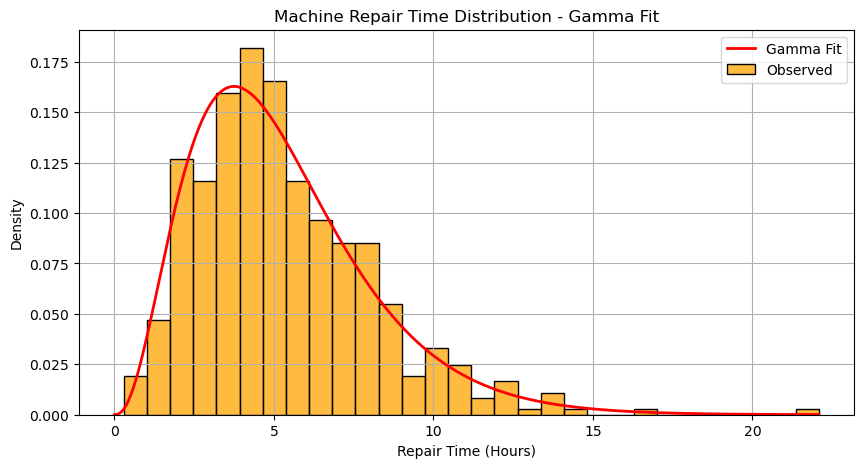

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Repair_Time_Hours'], bins=30, stat='density', color='orange', label='Observed')

x = np.linspace(0, df['Repair_Time_Hours'].max(), 300)
pdf = gamma.pdf(x, a=shape_k, scale=scale_theta)
plt.plot(x, pdf, 'r-', lw=2, label='Gamma Fit')

plt.title("Machine Repair Time Distribution - Gamma Fit")
plt.xlabel("Repair Time (Hours)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Step 3: Operational Probabilities

In [19]:
# Probability repair takes more than 8 hours
p_over_8 = 1 - gamma.cdf(8, a=shape_k, scale=scale_theta)
print(f"Probability repair takes over 8 hours: {p_over_8:.2%}")

# Probability repair finishes within 3 hours
p_under_3 = gamma.cdf(3, a=shape_k, scale=scale_theta)
print(f"Probability repair finishes within 3 hours: {p_under_3:.2%}")


Probability repair takes over 8 hours: 15.38%
Probability repair finishes within 3 hours: 22.02%


## ✅ Step 4: Compare by Machine Type

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13084\4280966356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine_Type', y='Repair_Time_Hours', data=df, palette='Set2')


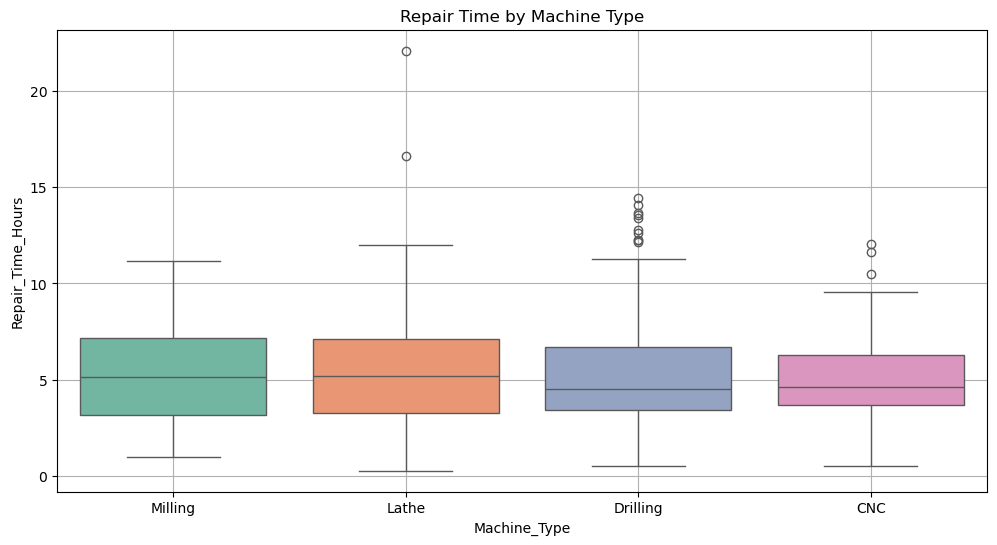

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Machine_Type', y='Repair_Time_Hours', data=df, palette='Set2')
plt.title("Repair Time by Machine Type")
plt.grid(True)
plt.show()


## ✅ Step 5: Business Insights
📌 Findings:

15.38% of repairs exceed 8 hours → critical for shift planning.

Milling and Lathe repairs show higher median times → flag for preventive maintenance.

Most repairs finish within 5–6 hours.